# run main

In [1]:
import main

# plot results

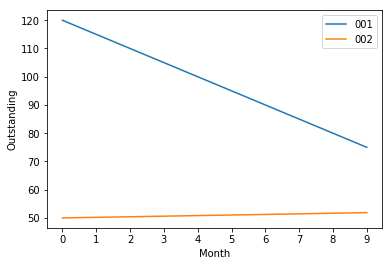

In [17]:
import matplotlib.pyplot as plt
import json
import redis
import pandas as pd

# fetch results
rredis = redis.StrictRedis(host='localhost', port=6379, db=0)
resultBase = json.loads(rredis.get('resultBase'))

# turn into Pandas data.frame
scenario = "1"
plotData = pd.DataFrame.from_dict(resultBase[scenario])

for label in plotData.columns.values:
    plt.plot(plotData[label], label = label)
plt.xlabel('Month')
plt.ylabel('Outstanding')
plt.legend()
plt.show()